<a href="https://colab.research.google.com/github/msaad1311/Imputation-across-applications/blob/master/Imputation_across_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# import reader
from sklearn.svm import SVR
import numpy as np
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
# import autosklearn.regression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

In [0]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [0]:
def trend(time, slope=0):
    return slope * time+50
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4 * 365 + 1)+50
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()
series.min()

In [0]:
np.arange(10)+10

Adding noise

In [0]:
series.shape

In [0]:
import numpy as np

noise = np.random.normal(0,10,1461)

In [0]:
noise.shape

In [0]:
series_noise = series+noise
# series_noise=series_noise.clip(0,series_noise.max())

In [0]:
plot_series(time, series_noise)

In [0]:
series_noise.min()

In [0]:
import random
series_missing=np.copy(series_noise)
for i in range(1,len(series_noise)):
    if random.random()<= 0.5:
        series_missing[i]=np.nan
    
'''
def misser (df,missing_percent = 0.5):
  for i in df.columns:
    for j, row_value in df[i].iteritems():
      if j==0:
        continue
      else:
        if random.random() <= missing_percent:
            df[i][j] = np.nan
  return df
'''

In [0]:
np.count_nonzero(np.isnan(series_noise)),np.count_nonzero(np.isnan(series_missing))

In [0]:
# plot_series(time,series_noise)
plot_series(time,series_missing)

In [0]:
df_original= pd.DataFrame(series_noise,columns=['Series'])
df_missing= pd.DataFrame(series_missing,columns=['Series'])

In [0]:
df_missing.fillna(-1.0).to_excel('Trend Missing.xlsx')
df_original.to_excel('Trend Original.xlsx')

In [0]:
df_missing.fillna(-1.0).to_csv('miss_data1.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python LIMELSTM.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lstm = pd.read_excel('/content/imputed_data_ for LSTM_trend.xlsx')
mse(df_original,df_lstm),mse(df_original,df_missing.interpolate())

In [0]:
plt.plot(df_lstm[0],color='r')
# plt.plot(df_missing,color='b')
plt.plot(df_original,color='b')
# plt.plot(df_missing.interpolate(),color='g')

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru = pd.read_excel('/content/imputed_data_ for GRU_trend.xlsx')
mse(df_original,df_gru),mse(df_original,df_missing.interpolate())

In [0]:
!python Hybrid.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hyd = pd.read_excel('/content/imputed_data_ for Hybrid_trend.xlsx')
mse(df_original,df_hyd),mse(df_original,df_missing.interpolate())

In [0]:
!python Residual.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_res = pd.read_excel('/content/imputed_data_ for Residue_trend.xlsx')
mse(df_original,df_res),mse(df_original,df_missing.interpolate())

In [0]:
!python Random.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_ran3 = pd.read_excel('/content/imputed_data_ for Random1_trend.xlsx')
mse(df_original,df_ran3),mse(df_original,df_missing.interpolate(limit_direction='both'))

In [0]:
!python Hybrid_multiple.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hyd_trend = pd.read_excel('/content/imputed_data_ for Hybrid multiple Trend.xlsx')
mse(df_original,df_hyd_trend),mse(df_original,df_missing.interpolate(limit_direction='both'))

In [0]:
!python GRU_Deep.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_grud = pd.read_excel('/content/imputed_data_ for GRU_deep_trend.xlsx')
mse(df_original,df_grud),mse(df_original,df_missing.interpolate(limit_direction='both'))

In [0]:
df_missing.interpolate(limit_direction='both').to_excel('Trend Linear.xlsx')

In [0]:
ecal = pd.read_excel('/content/MSE for python.xlsx')

In [0]:
ecal.head()

In [0]:
ecal = pd.read_excel('/content/MSE for python.xlsx')
ecal.head()
for i in ecal.columns:
    print('the mse for',i,'is:',mse(ecal['Original'],ecal[i]))

for i in ecal.columns:
    print('the mse for',i,'is:',mse(ecal['Original'],ecal[i]))

Seasonality


In [0]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time) + 150

In [0]:
baseline = 10
amplitude = 40
series_seasonal = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series_seasonal)
plt.show()

In [0]:
series_seasonal.min(),series_seasonal.max(),series_seasonal.shape

In [0]:
import numpy as np

noise = np.random.normal(0,10,1461)

In [0]:
seasonal_noise = series_seasonal+noise

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time, seasonal_noise)
plt.show()

In [0]:
seasonal_noise.min(),seasonal_noise.max(),seasonal_noise.shape

In [0]:
import random
series_missing_seasonal=np.copy(seasonal_noise)
for i in range(1,len(seasonal_noise)):
    if random.random()<= 0.5:
        series_missing_seasonal[i]=np.nan
    

In [0]:
np.count_nonzero(np.isnan(seasonal_noise)),np.count_nonzero(np.isnan(series_missing_seasonal))

In [0]:
plot_series(time,series_missing_seasonal)

In [0]:
df_original_season= pd.DataFrame(seasonal_noise,columns=['Series'])
df_missing_season= pd.DataFrame(series_missing_seasonal,columns=['Series'])

In [0]:
df_missing_season.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
df_original_season.to_excel('Seasonal Original.xlsx')
df_missing_season.fillna(-1.0).to_excel('Seasonal Missing.xlsx')
df_missing_season.interpolate(limit_direction='Both').to_excel('Seasonal Linear.xlsx')

In [0]:
!python LIMELSTM.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lstm = pd.read_excel('/content/imputed_data_ for LSTM_new.xlsx')
mse(df_original_season,df_lstm),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru = pd.read_excel('/content/imputed_data_ for GRU.xlsx')
mse(df_original_season,df_gru),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Hybrid.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hyd = pd.read_excel('/content/imputed_data_ for Hybrid.xlsx')
mse(df_original_season,df_hyd),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Residual.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_res = pd.read_excel('/content/imputed_data_ for Residue.xlsx')
mse(df_original_season,df_res),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru1 = pd.read_excel('/content/imputed_data_ for GRU_new.xlsx')
mse(df_original_season,df_gru1),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python LIMELSTM.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lstm1 = pd.read_excel('/content/imputed_data_ for LSTM.xlsx')
mse(df_original_season,df_lstm1),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Residual.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_res1 = pd.read_excel('/content/imputed_data_ for Residue_season.xlsx')
mse(df_original_season,df_res1),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru2 = pd.read_excel('/content/imputed_data_ for GRU_season.xlsx')
mse(df_original_season,df_gru2),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Random.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_ran = pd.read_excel('/content/imputed_data_ for Random.xlsx')
mse(df_original_season,df_ran),mse(df_original_season,df_missing_season.interpolate())

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_ran = pd.read_excel('/content/imputed_data_ for Random.xlsx')
mse(df_original_season,df_ran),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Hybrid_multiple.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hmul = pd.read_excel('/content/imputed_data_ for Hybrid multiple.xlsx')
mse(df_original_season,df_hmul),mse(df_original_season,df_missing_season.interpolate())

In [0]:
!python Random.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_ran1 = pd.read_excel('/content/imputed_data_ for Random1.xlsx')
mse(df_original_season,df_ran1),mse(df_original_season,df_missing_season.interpolate(limit_direction='both'))

Trend and Seasonal

In [0]:
slope = 0.05
series_both = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series_both)
plt.show()

In [0]:
noise = np.random.normal(0,10,1461)
series_both_noise = series_both+noise

In [0]:
import random
series_both_missing=np.copy(series_both_noise)
for i in range(1,len(series_noise)):
    if random.random()<= 0.5:
        series_both_missing[i]=np.nan

In [0]:
plot_series(time,series_both_missing)

In [0]:
df_original_both= pd.DataFrame(series_both_noise,columns=['Series'])
df_missing_both= pd.DataFrame(series_both_missing,columns=['Series'])

In [0]:
df_missing_both.fillna(-1.0).to_csv('miss_data2.txt',header=None, index=None, sep='\t', mode='a')

In [0]:
df_original_both.to_excel('Both Original.xlsx')
df_missing_both.fillna(-1.0).to_excel('Both Missing.xlsx')
df_missing_both.interpolate(limit_direction='Both').to_excel('Both Linear.xlsx')

In [0]:
!python LIMELSTM.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lstm_both = pd.read_excel('/content/imputed_data_ for LSTM_both.xlsx')
mse(df_original_both,df_lstm_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru_both = pd.read_excel('/content/imputed_data_ for GRU_both.xlsx')
mse(df_original_both,df_gru_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python Hybrid.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hyd_both = pd.read_excel('/content/imputed_data_ for Hybrid_both.xlsx')
mse(df_original_both,df_hyd_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python Hybrid_multiple.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hym_both = pd.read_excel('/content/imputed_data_ for Hybrid multiple Both.xlsx')
mse(df_original_both,df_hym_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python Residual.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_res_both = pd.read_excel('/content/imputed_data_ for Residue_both.xlsx')
mse(df_original_both,df_res_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python GRU_Deep.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_grd_both = pd.read_excel('/content/imputed_data_ for GRU_deep_both.xlsx')
mse(df_original_both,df_grd_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

In [0]:
!python Random.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lgg_both = pd.read_excel('/content/imputed_data_ for lstm-gru-gru_both.xlsx')
mse(df_original_both,df_lgg_both),mse(df_original_both,df_missing_both.interpolate(limit_direction='both'))

Random Time Series

In [0]:
import random
import numpy as np
time = np.arange(4 * 365 + 1)+50
series_ran = np.random.normal(50,10,1461)
plot_series(time,series_ran)

In [0]:
series_missing_ran=np.copy(series_ran)
for i in range(1,len(series_ran)):
    if random.random()<= 0.5:
        series_missing_ran[i]=np.nan

In [0]:
plot_series(time,series_missing_ran)

In [0]:
np.count_nonzero(np.isnan(series_ran)),np.count_nonzero(np.isnan(series_missing_ran))

In [0]:
df_original_ran= pd.DataFrame(series_ran,columns=['Series'])
df_missing_ran= pd.DataFrame(series_missing_ran,columns=['Series'])

In [0]:
df_original_ran.to_excel('Random Original.xlsx')
df_missing_ran.fillna(-1.0).to_excel('Random Missing.xlsx')
df_missing_ran.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python LIMELSTM.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lstm = pd.read_excel('/content/imputed_data_ for LSTM_Random.xlsx')
mse(df_original_ran,df_lstm),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
mae(df_original_ran,df_lstm),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))

In [0]:
!python LIMEGRU.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_gru = pd.read_excel('/content/imputed_data_ for GRU_Random.xlsx')
mse(df_original_ran,df_gru),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
mae(df_original_ran,df_gru),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))

In [0]:
!python Hybrid.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hyd = pd.read_excel('/content/imputed_data_ for Hybrid_Random.xlsx')
mse(df_original_ran,df_hyd),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
mae(df_original_ran,df_hyd),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))

In [0]:
!python Hybrid_multiple.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_hym = pd.read_excel('/content/imputed_data_ for Hybrid multiple Random.xlsx')
mse(df_original_ran,df_hym),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
print(mae(df_original_ran,df_hym),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both')))

In [0]:
!python GRU_Deep.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_grd = pd.read_excel('/content/imputed_data_ for GRU_deep_Random.xlsx')
mse(df_original_ran,df_grd),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
print(mae(df_original_ran,df_grd),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both')))

In [0]:
!python Random.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
df_lgg = pd.read_excel('/content/imputed_data_ for lstm-gru-gru-Random.xlsx')
mse(df_original_ran,df_lgg),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both'))
print(mae(df_original_ran,df_lgg),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both')))

In [0]:
!python Residual.py

In [0]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
df_res = pd.read_excel('/content/imputed_data_ for Residue_Random.xlsx')
print(mse(df_original_ran,df_res),mse(df_original_ran,df_missing_ran.interpolate(limit_direction='both')))
print(mae(df_original_ran,df_res),mae(df_original_ran,df_missing_ran.interpolate(limit_direction='both')))

In [0]:
df_missing_ran.interpolate(limit_direction='both').to_excel('Random Linear.xlsx')

In [0]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

ecal = pd.read_excel('/content/MSE for python.xlsx')
ecal.head()
for i in ecal.columns:
    print('the mse for',i,'is:',mse(ecal['Original'],ecal[i]))
print('------------------')
for i in ecal.columns:
    print('the mae for',i,'is:',mae(ecal['Original'],ecal[i]))


# Ensembling


Trend Ensembling

In [0]:
df = pd.read_excel('/content/Trend Missing.xlsx')
df.replace(-1.0,np.nan,inplace=True)
df.head()
df.drop(columns=['Unnamed: 0'],inplace=True)
print(df.isnull().sum())

In [0]:
import random
series_missing=np.copy(df.values)
for i in range(1,len(df.values)):
    if random.random()<= 0.10:
        series_missing[i]=np.nan

In [0]:
df_missing = pd.DataFrame(series_missing,columns=['Series'])
print(df_missing.isnull().sum())
print(df.shape,df_missing.shape)

In [0]:
df_missing.fillna(-1.0).to_excel('Trend Further missing.xlsx')
df_missing.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python LIMEGRU.py

In [0]:
!python Residual.py

In [0]:
mdf = pd.read_excel('/content/ML Ensemble Training.xlsx')
mdf.head()

In [0]:
x_train = mdf[['GRU','Residual']].values
y_train=mdf[['Original']].values
type(x_train),x_train.shape,type(y_train),y_train.shape

In [0]:
from sklearn.svm import SVR
import numpy as np
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
# import autosklearn.regression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [0]:
gbr = ensemble.GradientBoostingRegressor()
clf = SVR(kernel='linear')
clf.fit(x_train,y_train)
gbr.fit(x_train,y_train)

In [0]:
ytest = pd.read_excel('/content/y_test.xlsx').values
xtest = pd.read_excel('/content/x_test.xlsx').values
type(ytest),ytest.shape,type(xtest),xtest.shape

In [0]:
predictions = clf.predict(xtest)
predictions2 = gbr.predict(xtest)

In [0]:
mse(ytest,predictions),mae(ytest,predictions),mse(ytest,predictions2),mae(ytest,predictions2)

Seasonal Ensembling

In [0]:
df = pd.read_excel('/content/Seasonal Missing.xlsx')
df.replace(-1.0,np.nan,inplace=True)
print(df.head())
df.drop(columns=['Unnamed: 0'],inplace=True)
print(df.isnull().sum())

In [0]:
import random
series_missing=np.copy(df.values)
for i in range(1,len(df.values)):
    if random.random()<= 0.10:
        series_missing[i]=np.nan

In [0]:
df_missing = pd.DataFrame(series_missing,columns=['Series'])
print(df_missing.isnull().sum())
print(df.shape,df_missing.shape)

In [0]:
df_missing.fillna(-1.0).to_excel('Seasonal Further missing.xlsx')
df_missing.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python Random.py

In [0]:
!python Residual.py

In [0]:
mdf = pd.read_excel('/content/ML Ensemble Training.xlsx')
print(mdf.head())
x_train = mdf[['LSTM GRU GRU','Residual']].values
y_train=mdf[['Orignial']].values
type(x_train),x_train.shape,type(y_train),y_train.shape

In [0]:
ytest = pd.read_excel('/content/y_test.xlsx').values
xtest = pd.read_excel('/content/x_test.xlsx').values
type(ytest),ytest.shape,type(xtest),xtest.shape

In [0]:
gbr = ensemble.GradientBoostingRegressor()
clf = SVR(kernel='linear')
clf.fit(x_train,y_train)
gbr.fit(x_train,y_train)
predictions = clf.predict(xtest)
predictions2 = gbr.predict(xtest)

In [0]:
mse(ytest,predictions),mae(ytest,predictions),mse(ytest,predictions2),mae(ytest,predictions2)

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))

# reg.coef_

# reg.intercept_

lr_pred=reg.predict(xtest)


In [0]:
mse(ytest,lr_pred),mae(ytest,lr_pred)

In [0]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
# model.score(x_test,y_test)

In [0]:
mse(ytest,model.predict(xtest)),mae(ytest,model.predict(xtest))

In [0]:
import xgboost as xgb
model1=xgb.XGBRegressor()
model1.fit(x_train, y_train)
# model.score(x_test,y_test)

In [0]:
mse(ytest,model1.predict(xtest)),mae(ytest,model1.predict(xtest))

In [0]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=30)
neigh.fit(x_train, y_train)
mse(ytest,neigh.predict(xtest)),mae(ytest,neigh.predict(xtest))

In [0]:
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(x_train, y_train)
mse(ytest,reg.predict(xtest)),mae(ytest,reg.predict(xtest))

In [0]:
avg = (reg.predict(xtest).reshape(-1,1)+lr_pred.reshape(-1,1)+predictions.reshape(-1,1))

In [0]:
avg.shape

In [0]:
avg=avg/3

In [0]:
avg.shape,ytest.shape

In [0]:
mae(ytest,avg)

Both Ensembling

In [0]:
df = pd.read_excel('/content/Both Missing.xlsx')
df.replace(-1.0,np.nan,inplace=True)
print(df.head())
df.drop(columns=['Unnamed: 0'],inplace=True)
print(df.isnull().sum())

   Unnamed: 0      Series
0           0  236.841804
1           1         NaN
2           2         NaN
3           3         NaN
4           4         NaN
Series    718
dtype: int64


In [0]:
import random
series_missing=np.copy(df.values)
for i in range(1,len(df.values)):
    if random.random()<= 0.10:
        series_missing[i]=np.nan

In [0]:
df_missing = pd.DataFrame(series_missing,columns=['Series'])
print(df_missing.isnull().sum())
print(df.shape,df_missing.shape)

Series    781
dtype: int64
(1461, 1) (1461, 1)


In [0]:
df_missing.fillna(-1.0).to_excel('Both Further missing.xlsx')
df_missing.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python LIMEGRU.py


I0222 23:57:22.929220 139884865714048 utils.py:141] NumExpr defaulting to 2 threads.

W0222 23:57:22.937943 139884865714048 module_wrapper.py:139] From LIMEGRU.py:114: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0222 23:57:22.938246 139884865714048 module_wrapper.py:139] From LIMEGRU.py:117: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-22 23:57:22.956192: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-22 23:57:22.959787: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3200bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-22 23:57:22.959843: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-22 23:57:22.994326: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-22 23

In [0]:
!python Hybrid.py


I0222 23:59:55.608554 139819253102464 utils.py:141] NumExpr defaulting to 2 threads.

W0222 23:59:55.615999 139819253102464 module_wrapper.py:139] From Hybrid.py:115: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0222 23:59:55.616322 139819253102464 module_wrapper.py:139] From Hybrid.py:118: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-22 23:59:55.621507: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-22 23:59:55.621753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2e6cbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-22 23:59:55.621786: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-22 23:59:55.624146: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-22 23:5

In [0]:
from google.colab import files

files.download('/content/imputed_data_ for Hybrid_both Ensemble.xlsx')

In [0]:
mdf = pd.read_excel('/content/ML Ensemble Training.xlsx')
print(mdf.head())
x_train = mdf[['GRU','Hybrid']].values
y_train=mdf[['Original']].values
type(x_train),x_train.shape,type(y_train),y_train.shape

     Original         GRU      Hybrid
0  238.189475  241.865651  241.090878
1  230.814541  241.772144  241.680785
2  226.499687  221.341593  219.743735
3  194.864339  222.576206  222.125256
4  196.105779  197.601099  197.240561


(numpy.ndarray, (63, 2), numpy.ndarray, (63, 1))

In [0]:
ytest = pd.read_excel('/content/y_test.xlsx').values
xtest = pd.read_excel('/content/x_test.xlsx').values
type(ytest),ytest.shape,type(xtest),xtest.shape

(numpy.ndarray, (718, 1), numpy.ndarray, (718, 2))

In [0]:
gbr = ensemble.GradientBoostingRegressor()
clf = SVR(kernel='linear')
clf.fit(x_train,y_train)
gbr.fit(x_train,y_train)
reg = LinearRegression().fit(x_train, y_train)
predictions = clf.predict(xtest)
predictions2 = gbr.predict(xtest)
lr_pred=reg.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
mse(ytest,predictions),mae(ytest,predictions),mse(ytest,predictions2),mae(ytest,predictions2),mse(ytest,lr_pred),mae(ytest,lr_pred)

(151.81165936289236,
 9.514375182095112,
 292.0869235103149,
 12.830268622277272,
 152.17591804886598,
 9.70050261184138)

Random Ensemble

In [0]:
df = pd.read_excel('/content/Random Missing.xlsx')
df.replace(-1.0,np.nan,inplace=True)
print(df.head())
df.drop(columns=['Unnamed: 0'],inplace=True)
print(df.isnull().sum())

   Unnamed: 0     Series
0           0  64.262716
1           1  51.184589
2           2        NaN
3           3        NaN
4           4  59.402088
Series    750
dtype: int64


In [0]:
import random
series_missing=np.copy(df.values)
for i in range(1,len(df.values)):
    if random.random()<= 0.10:
        series_missing[i]=np.nan

In [0]:
df_missing = pd.DataFrame(series_missing,columns=['Series'])
print(df_missing.isnull().sum())
print(df.shape,df_missing.shape)

Series    822
dtype: int64
(1461, 1) (1461, 1)


In [0]:
df_missing.fillna(-1.0).to_excel('Random Further missing.xlsx')
df_missing.fillna(-1.0).to_csv('miss_data.txt', header=None, index=None, sep='\t', mode='a')

In [0]:
!python Hybrid.py


I0223 00:27:56.841311 140488953489280 utils.py:141] NumExpr defaulting to 2 threads.

W0223 00:27:56.849101 140488953489280 module_wrapper.py:139] From Hybrid.py:115: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0223 00:27:56.849441 140488953489280 module_wrapper.py:139] From Hybrid.py:118: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-23 00:27:56.854991: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-23 00:27:56.855240: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2f76bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-23 00:27:56.855279: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-23 00:27:56.857363: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-23 00:2

In [0]:
!python Residual.py


I0223 00:36:38.245556 140364871370624 utils.py:141] NumExpr defaulting to 2 threads.

W0223 00:36:38.253382 140364871370624 module_wrapper.py:139] From Residual.py:117: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0223 00:36:38.253720 140364871370624 module_wrapper.py:139] From Residual.py:120: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-23 00:36:38.259517: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-23 00:36:38.259786: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x29acbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-23 00:36:38.259825: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-23 00:36:38.262120: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-23 

In [0]:
mdf = pd.read_excel('/content/ML Ensemble Training.xlsx')
print(mdf.head())
x_train = mdf[['Residual','Hybrid']].values
y_train=mdf[['Original']].values
type(x_train),x_train.shape,type(y_train),y_train.shape

   Original     Hybrid   Residual
0  54.22838  49.069311  49.062313
1  43.83395  49.069225  49.058518
2  59.13587  49.063229  48.889733
3  50.66887  49.103583  48.933853
4  44.47127  49.078277  49.198943


(numpy.ndarray, (72, 2), numpy.ndarray, (72, 1))

In [0]:
ytest = pd.read_excel('/content/y_test.xlsx').values
xtest = pd.read_excel('/content/x_test.xlsx').values
type(ytest),ytest.shape,type(xtest),xtest.shape

(numpy.ndarray, (750, 1), numpy.ndarray, (750, 2))

In [0]:
gbr = ensemble.GradientBoostingRegressor()
clf = SVR(kernel='linear')
clf.fit(x_train,y_train)
gbr.fit(x_train,y_train)
reg = LinearRegression().fit(x_train, y_train)
predictions = clf.predict(xtest)
predictions2 = gbr.predict(xtest)
lr_pred=reg.predict(xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
mse(ytest,predictions),mae(ytest,predictions),mse(ytest,predictions2),mae(ytest,predictions2),mse(ytest,lr_pred),mae(ytest,lr_pred)

(98.64632057835199,
 7.931519706878161,
 153.9117113357779,
 9.91643871508676,
 118.62206187363128,
 8.576189780740886)

# Price to Price

In [0]:
df=pd.read_excel('/content/LSP Need Interpolation.xlsx')

In [3]:
df.head()

,Date,Average Price
0,2012-11-14,1.752856
1,2012-11-15,NaN
2,2012-11-16,2.177029
3,2012-11-17,2.177029
4,2012-11-18,2.177029


In [0]:
df_main=df[['Average Price']]

In [5]:
df_main.head()

,Average Price
0,1.752856
1,NaN
2,2.177029
3,2.177029
4,2.177029


In [0]:
df_main.fillna(-1.0).to_csv('miss_data.txt',header=None, index=None, sep='\t', mode='a')
df_main.fillna(-1.0).to_excel('LSP miss data.xlsx')

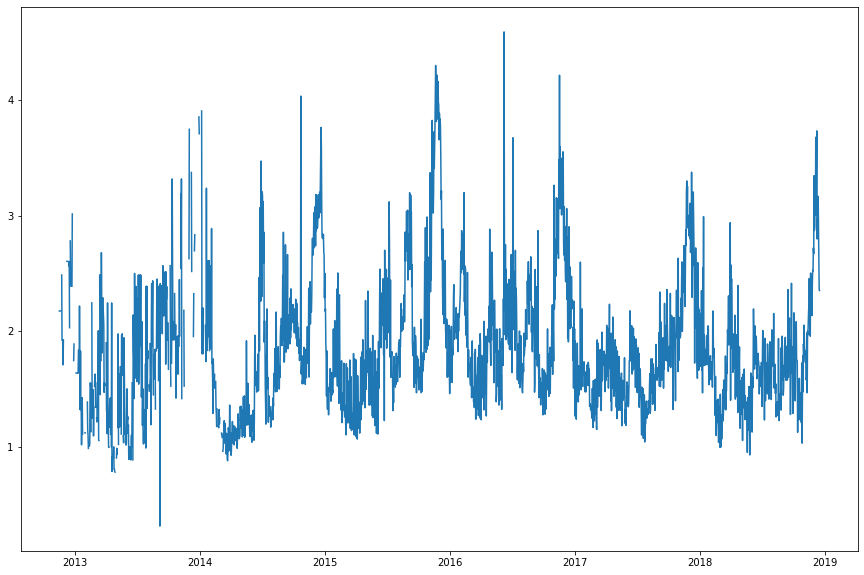

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'],df['Average Price'])
plt.show()

the above plot shows that it is seasonal data. So, Residual and LSTM-GRU-GRU are the best which will be used.

In [19]:
!python LSTM-GRU-GRU.py


I0223 22:18:29.436404 140444446513024 utils.py:141] NumExpr defaulting to 2 threads.

W0223 22:18:29.443908 140444446513024 module_wrapper.py:139] From LSTM-GRU-GRU.py:116: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0223 22:18:29.444257 140444446513024 module_wrapper.py:139] From LSTM-GRU-GRU.py:119: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-23 22:18:29.450321: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-23 22:18:29.450548: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b5cbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-23 22:18:29.450620: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-23 22:18:29.452667: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
202

In [20]:
!python Residual.py


I0223 22:34:08.249019 140159888004992 utils.py:141] NumExpr defaulting to 2 threads.

W0223 22:34:08.257464 140159888004992 module_wrapper.py:139] From Residual.py:117: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.


W0223 22:34:08.257816 140159888004992 module_wrapper.py:139] From Residual.py:120: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

2020-02-23 22:34:08.264042: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-02-23 22:34:08.264307: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x22fcbc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-23 22:34:08.264342: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-23 22:34:08.266481: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-23 